In [2]:
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns
pd.set_option('display.max_columns',100)


## Time Series
Neste notebook queremos demonstrar o uso de estrutura de dados "Time Series" do Pandas, que não é nada mais do que um Series ou DataFrame, com o index datas e com facilidades específicas para trabalhar com data-hora.

## Carregar os dados

In [25]:
logs = pd.read_csv('data/nonpublic/logs-4300459-2021.csv',parse_dates=['timecreated'])
del logs['ip']
logs[:3]

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,realuserid
0,1656410674,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,5498136,50,79580,57309,79580,NaN,0,"a:1:{s:19:""coursesectionnumber"";i:11;}",2021-02-15 20:23:04,web,NaN
1,1654886276,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,5498136,50,79580,12720,79580,NaN,0,"a:1:{s:19:""coursesectionnumber"";i:11;}",2021-02-02 14:03:13,web,NaN
2,1654886263,\mod_chat\event\course_module_viewed,mod_chat,viewed,course_module,chat,4973.0,r,2,5552661,70,3074106,12720,79580,NaN,0,N;,2021-02-02 14:03:08,web,NaN


Vamos ver se tem uma coluna com data-hora:

In [26]:
logs.dtypes

id                            int64
eventname                    object
component                    object
action                       object
target                       object
objecttable                  object
objectid                    float64
crud                         object
edulevel                      int64
contextid                     int64
contextlevel                  int64
contextinstanceid             int64
userid                        int64
courseid                      int64
relateduserid               float64
anonymous                     int64
other                        object
timecreated          datetime64[ns]
origin                       object
realuserid                  float64
dtype: object

Sim, a coluna `timecreated`. Essa coluna vai vir o index:

In [27]:
logs = logs.set_index('timecreated')

O index agora é do tipo DatetimeIndex, e isso permite N facilidades

In [29]:
logs.index

DatetimeIndex(['2021-02-15 20:23:04', '2021-02-02 14:03:13',
               '2021-02-02 14:03:08', '2021-02-02 14:03:04',
               '2021-02-02 14:03:04', '2021-01-31 12:36:24',
               '2021-01-31 12:36:01', '2021-01-31 12:35:56',
               '2021-01-31 12:35:52', '2021-01-31 12:35:52',
               ...
               '2020-08-02 17:10:31', '2020-08-02 17:10:31',
               '2020-08-02 17:10:31', '2020-08-02 17:10:31',
               '2020-08-02 17:10:31', '2020-08-02 17:10:31',
               '2020-08-02 17:10:31', '2020-08-02 17:10:31',
               '2020-08-02 17:10:31', '2020-08-02 17:10:31'],
              dtype='datetime64[ns]', name='timecreated', length=51873, freq=None)

O principal que podemos fazer agora é "resample", que é o equivalente de "groupby" para datas-hora. Por exemplo por dia ('D') ou por semana ('W'). 

In [30]:
logs.resample('D')

Um .resample deve ser seguido pela maneira de agregar: sum, count, nunique (número de únicos), etc. Por exemplo, a quantidade de linhas nos logs agregado por mês:

In [32]:
logs.resample('M').count()

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,origin,realuserid
timecreated,,,,,,,,,,,,,,,,,,,
2020-08-31,13583,13583,13583,13583,13583,10726,10726,13583,13583,13583,13583,13583,13583,13583,4678,13583,13583,13583,9
2020-09-30,12864,12864,12864,12864,12864,10029,10029,12864,12864,12864,12864,12864,12864,12864,4899,12864,12864,12864,4
2020-10-31,8696,8696,8696,8696,8696,5725,5725,8696,8696,8696,8696,8696,8696,8696,1931,8696,8696,8696,0
2020-11-30,7539,7539,7539,7539,7539,4229,4229,7539,7539,7539,7539,7539,7539,7539,1744,7539,7539,7539,0
2020-12-31,9088,9088,9088,9088,9088,6364,6364,9088,9088,9088,9088,9088,9088,9088,4195,9088,9088,9088,0
2021-01-31,98,98,98,98,98,58,58,98,98,98,98,98,98,98,5,98,98,98,0
2021-02-28,5,5,5,5,5,1,1,5,5,5,5,5,5,5,0,5,5,5,0


Ou o número de registros únicos para cada coluna, para cada semana. A coluna `userid` abaixo diz quantos userids *diferentes* cada semana acessaram o ambiente.

In [34]:
logs.resample('W').nunique()

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,origin,realuserid
timecreated,,,,,,,,,,,,,,,,,,,
2020-08-02,190,15,3,6,11,10,74,4,3,2,2,2,3,1,50,1,72,2,0
2020-08-09,110,12,3,5,7,9,24,3,3,3,2,3,3,1,3,1,30,2,0
2020-08-16,1052,39,13,10,21,27,681,4,3,140,2,140,3,1,56,2,513,3,0
2020-08-23,6185,73,19,20,39,33,662,4,3,37,2,37,57,1,58,2,578,3,1
2020-08-30,4892,67,18,20,36,32,586,4,3,37,2,37,54,1,58,2,506,4,0
2020-09-06,3680,45,14,16,25,23,412,4,3,31,2,31,52,1,51,1,384,3,0
2020-09-13,1560,59,16,14,31,30,701,4,3,39,2,39,38,1,58,2,223,3,0
2020-09-20,3929,65,19,17,38,34,889,4,3,51,2,51,48,1,58,1,729,3,0
2020-09-27,3235,67,19,20,36,34,513,4,3,49,2,49,50,1,51,1,557,3,0


<AxesSubplot:xlabel='timecreated'>

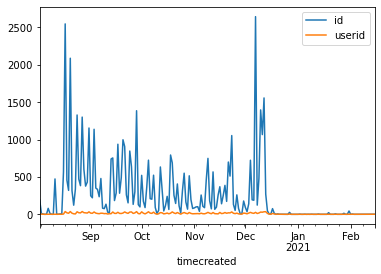

In [23]:
logs.resample('D').agg({'id':'count','userid':'nunique'}).plot()

Mas o que queremos agora, agregar por semana, mas desagregar por userid, para poder fazer uma visualização de ações por semana para cada userid. Minha primeira tentativa não deu certo:

In [44]:
logs.resample("W").groupby('userid')

TypeError: 'TimeGrouper' object is not callable

Mas aí, fiz uma busca por `pandas groupby with resample` e cai no https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.resample.html . Aparentemente, isso deve funcionar:

In [45]:
logs.groupby('userid').resample("W")

In [46]:
logs.groupby('userid').resample("W").count()

id  eventname  component  action  target  objecttable  \
userid  timecreated                                                           
-1      2020-08-16   112        112        112     112     112          112   
        2020-08-23   722        722        722     722     722          722   
        2020-08-30   390        390        390     390     390          390   
        2020-09-06   271        271        271     271     271          271   
        2020-09-13   207        207        207     207     207          207   
...                  ...        ...        ...     ...     ...          ...   
 307966 2020-12-27     0          0          0       0       0            0   
        2021-01-03     0          0          0       0       0            0   
        2021-01-10     0          0          0       0       0            0   
        2021-01-17     0          0          0       0       0            0   
        2021-01-24    22         22         22      22      22           11   

                     objectid  crud  edulevel  contextid  contextlevel  \
userid  timecreated                                                      
-1      2020-08-16        112   112       112        112           112   
        2020-08-23        722   722       722        722           722   
        2020-08-30        390   390       390        390           390   
        2020-09-06        271   271       271        271           271   
        2020-09-13        207   207       207        207           207   
...                       ...   ...       ...        ...           ...   
 307966 2020-12-27          0     0         0          0             0   
        2021-01-03          0     0         0          0             0   
        2021-01-10          0     0         0          0             0   
        2021-01-17          0     0         0          0             0   
        2021-01-24         11    22        22         22            22   

                     contextinstanceid  userid  courseid  relateduserid  \
userid  timecreated                                                       
-1      2020-08-16                 112     112       112            112   
        2020-08-23                 722     722       722            722   
        2020-08-30                 390     390       390            390   
        2020-09-06                 271     271       271            271   
        2020-09-13                 207     207       207            207   
...                                ...     ...       ...            ...   
 307966 2020-12-27                   0       0         0              0   
        2021-01-03                   0       0         0              0   
        2021-01-10                   0       0         0              0   
        2021-01-17                   0       0         0              0   
        2021-01-24                  22      22        22              0   

                     anonymous  other  origin  realuserid  
userid  timecreated                                        
-1      2020-08-16         112    112     112           0  
        2020-08-23         722    722     722           0  
        2020-08-30         390    390     390           0  
        2020-09-06         271    271     271           0  
        2020-09-13         207    207     207           0  
...                        ...    ...     ...         ...  
 307966 2020-12-27           0      0       0           0  
        2021-01-03           0      0       0           0  
        2021-01-10           0      0       0           0  
        2021-01-17           0      0       0           0  
        2021-01-24          22     22      22           0  

[978 rows x 19 columns]

De fato, agora tenho um dataframe com index hierárquico, com o número de entradas ("count") no logs para cada userid e por semana. Agora, como devemos visualizar isso?  

In [48]:
clicks_por_userid_por_semana = logs.groupby('userid').resample("W").count()['id']
clicks_por_userid_por_semana

userid   timecreated
-1       2020-08-16     112
         2020-08-23     722
         2020-08-30     390
         2020-09-06     271
         2020-09-13     207
                       ... 
 307966  2020-12-27       0
         2021-01-03       0
         2021-01-10       0
         2021-01-17       0
         2021-01-24      22
Name: id, Length: 978, dtype: int64

O método .plot() do Pandas não dá resultado úteis.

<AxesSubplot:xlabel='userid,timecreated'>

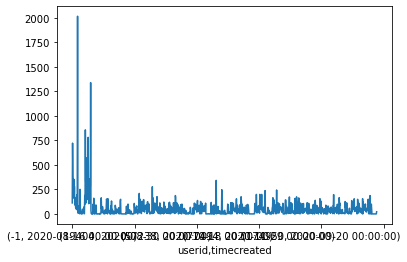

In [51]:
clicks_por_userid_por_semana.plot()

In [52]:
clicks_por_userid_por_semana.reset_index()

,userid,timecreated,id
0,-1,2020-08-16,112
1,-1,2020-08-23,722
2,-1,2020-08-30,390
3,-1,2020-09-06,271
4,-1,2020-09-13,207
...,...,...,...
973,307966,2020-12-27,0
974,307966,2021-01-03,0
975,307966,2021-01-10,0
976,307966,2021-01-17,0


<AxesSubplot:xlabel='timecreated', ylabel='id'>

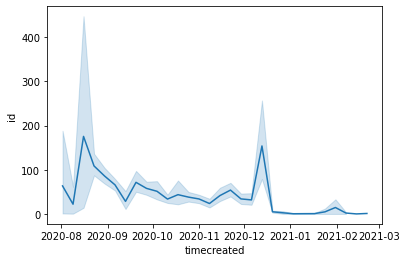

In [53]:
data = clicks_por_userid_por_semana.reset_index()
sns.lineplot(data=data,x='timecreated',y='id')

Aparentemente, o Seaborn re-agrega (faz a média?) para todas as semanas?

<AxesSubplot:xlabel='timecreated', ylabel='id'>

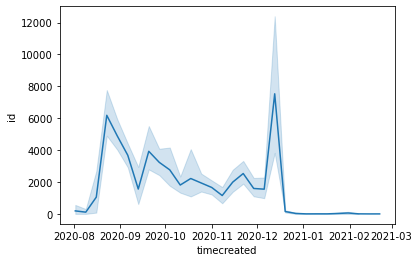

In [56]:
sns.lineplot(data=data,x='timecreated',y='id',estimator='sum')

Mas como mostrar uma linha por userid? A solução abaixo não é muito muito bom. 

<AxesSubplot:xlabel='timecreated', ylabel='id'>

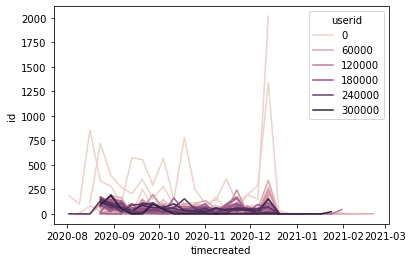

In [57]:
sns.lineplot(data=data,x='timecreated',y='id',hue='userid')

Mesmo depois de filtrar, não é uma visualização boa. Alias, acho que o Seaborn agrega por userid de alguma forma? Teria que entender melhor...

<AxesSubplot:xlabel='timecreated', ylabel='id'>

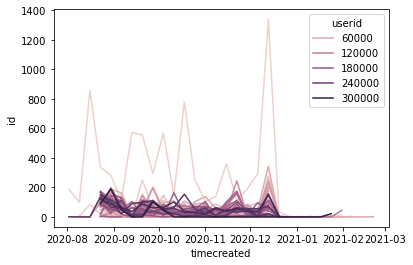

In [59]:
sns.lineplot(data=data.query("userid != 0 & userid != -1"),x='timecreated',y='id',hue='userid')

Talvez o Seaborn acha que userid é numérico, mas na verdade é categórico. E se mudar para strings?

In [61]:
data=data.query("userid != 0 & userid != -1")
data['userid'] = data['userid'].astype('str')
data.dtypes

userid                 object
timecreated    datetime64[ns]
id                      int64
dtype: object

<AxesSubplot:xlabel='timecreated', ylabel='id'>

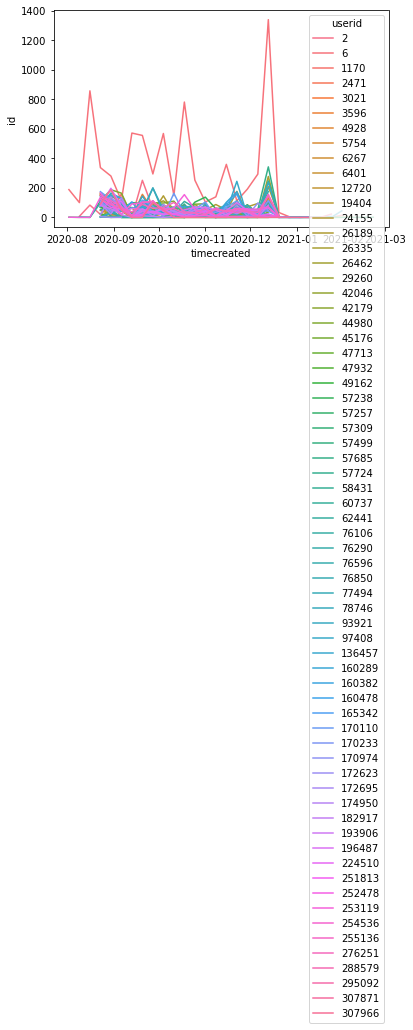

In [62]:
sns.lineplot(data=data,x='timecreated',y='id',hue='userid')

A sim, é isso mesmo, mas só piorou, kkk. Vamos deixar Eduardo descobrir como melhor este gráfico. Estava pensando em "múltipos pequenos", de um monte de lineplots um acima do outro, para que as linhas não se sobrepõe num único gráfico.